In [152]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [153]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [154]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float 
from flask import Flask, jsonify

In [155]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [156]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine)

In [157]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [158]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station


In [159]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [164]:
# Find the most recent date in the data set.
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print("Most recent date in the data set: "+format(latest_date))

Most recent date in the data set: 2017-08-23


In [193]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_from_latest_date=dt.date(2017,8,23)-dt.timedelta(days=365)
print('One year from most recent date: '+format(year_from_latest_date))

One year from most recent date: 2016-08-23


In [261]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>=year_from_latest_date).\
    order_by(Measurement.date)
print(precipitation_scores)

SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ? ORDER BY measurement.date


In [255]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>=year_from_latest_date).\
    order_by(Measurement.date).all()
#    filter(Measurement.date<="2017-08-23").all()

In [262]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_DF = pd.DataFrame(precipitation_scores,columns=['Date','Precipitation'])
precipitation_DF.set_index('Date',inplace=True)
precipitation_DF = precipitation_DF.dropna()
precipitation_DF.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [196]:
# Sort the dataframe by date
precipitation_DF=precipitation_DF.sort_index()
precipitation_DF.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


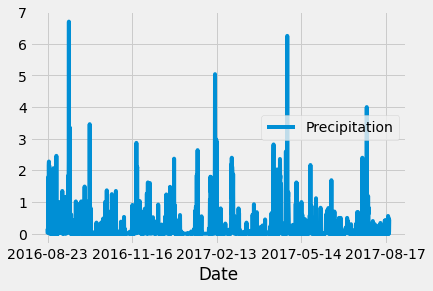

In [253]:
# Use Pandas Plotting with Matplotlib to plot the data
fig1=precipitation_DF.plot()
plt.savefig("Precipitation.png")
# plt.show()

In [198]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_DF.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [200]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(Station)
stations_count=stations.count()
print("There are "+str(stations_count)+" stations")

There are 9 stations


In [228]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_by_activity=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active=stations_by_activity[0][0]

print("List of stations and measurement counts")
for x in stations_by_activity:
    print(x[0],"  ",x[1])
print("")    
print("Most active station: "+most_active)

List of stations and measurement counts
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838    511

Most active station: USC00519281


In [243]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active).all()
print("Temperatures recorded by station ",most_active)
print("Highest temperature: ",round(temperatures[0][1],1),"F")
print("Lowest temperature: ",round(temperatures[0][0],1),"F")
print("Average temperature: ",round(temperatures[0][2],1),"F")


Temperatures recorded by station  USC00519281
Highest temperature:  85.0 F
Lowest temperature:  54.0 F
Average temperature:  71.7 F


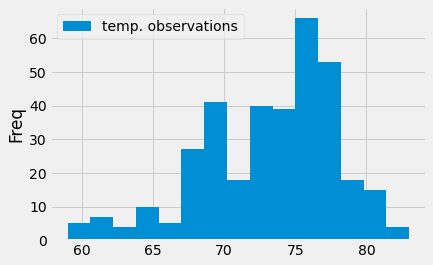

In [252]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp_readings=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station==most_active).\
    filter(Measurement.date>=year_from_latest_date).\
    group_by(Measurement.date).all()
temp_readings_DF=pd.DataFrame(data=most_active_temp_readings,columns=["date","tobs"])
temp_readings_DF=temp_readings_DF.set_index('date',drop=True)

plt.hist(temp_readings_DF['tobs'],bins=15, label="temp. observations")
plt.ylabel("Freq")
plt.legend()
plt.savefig("Histogram_of_temperature_readings.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()